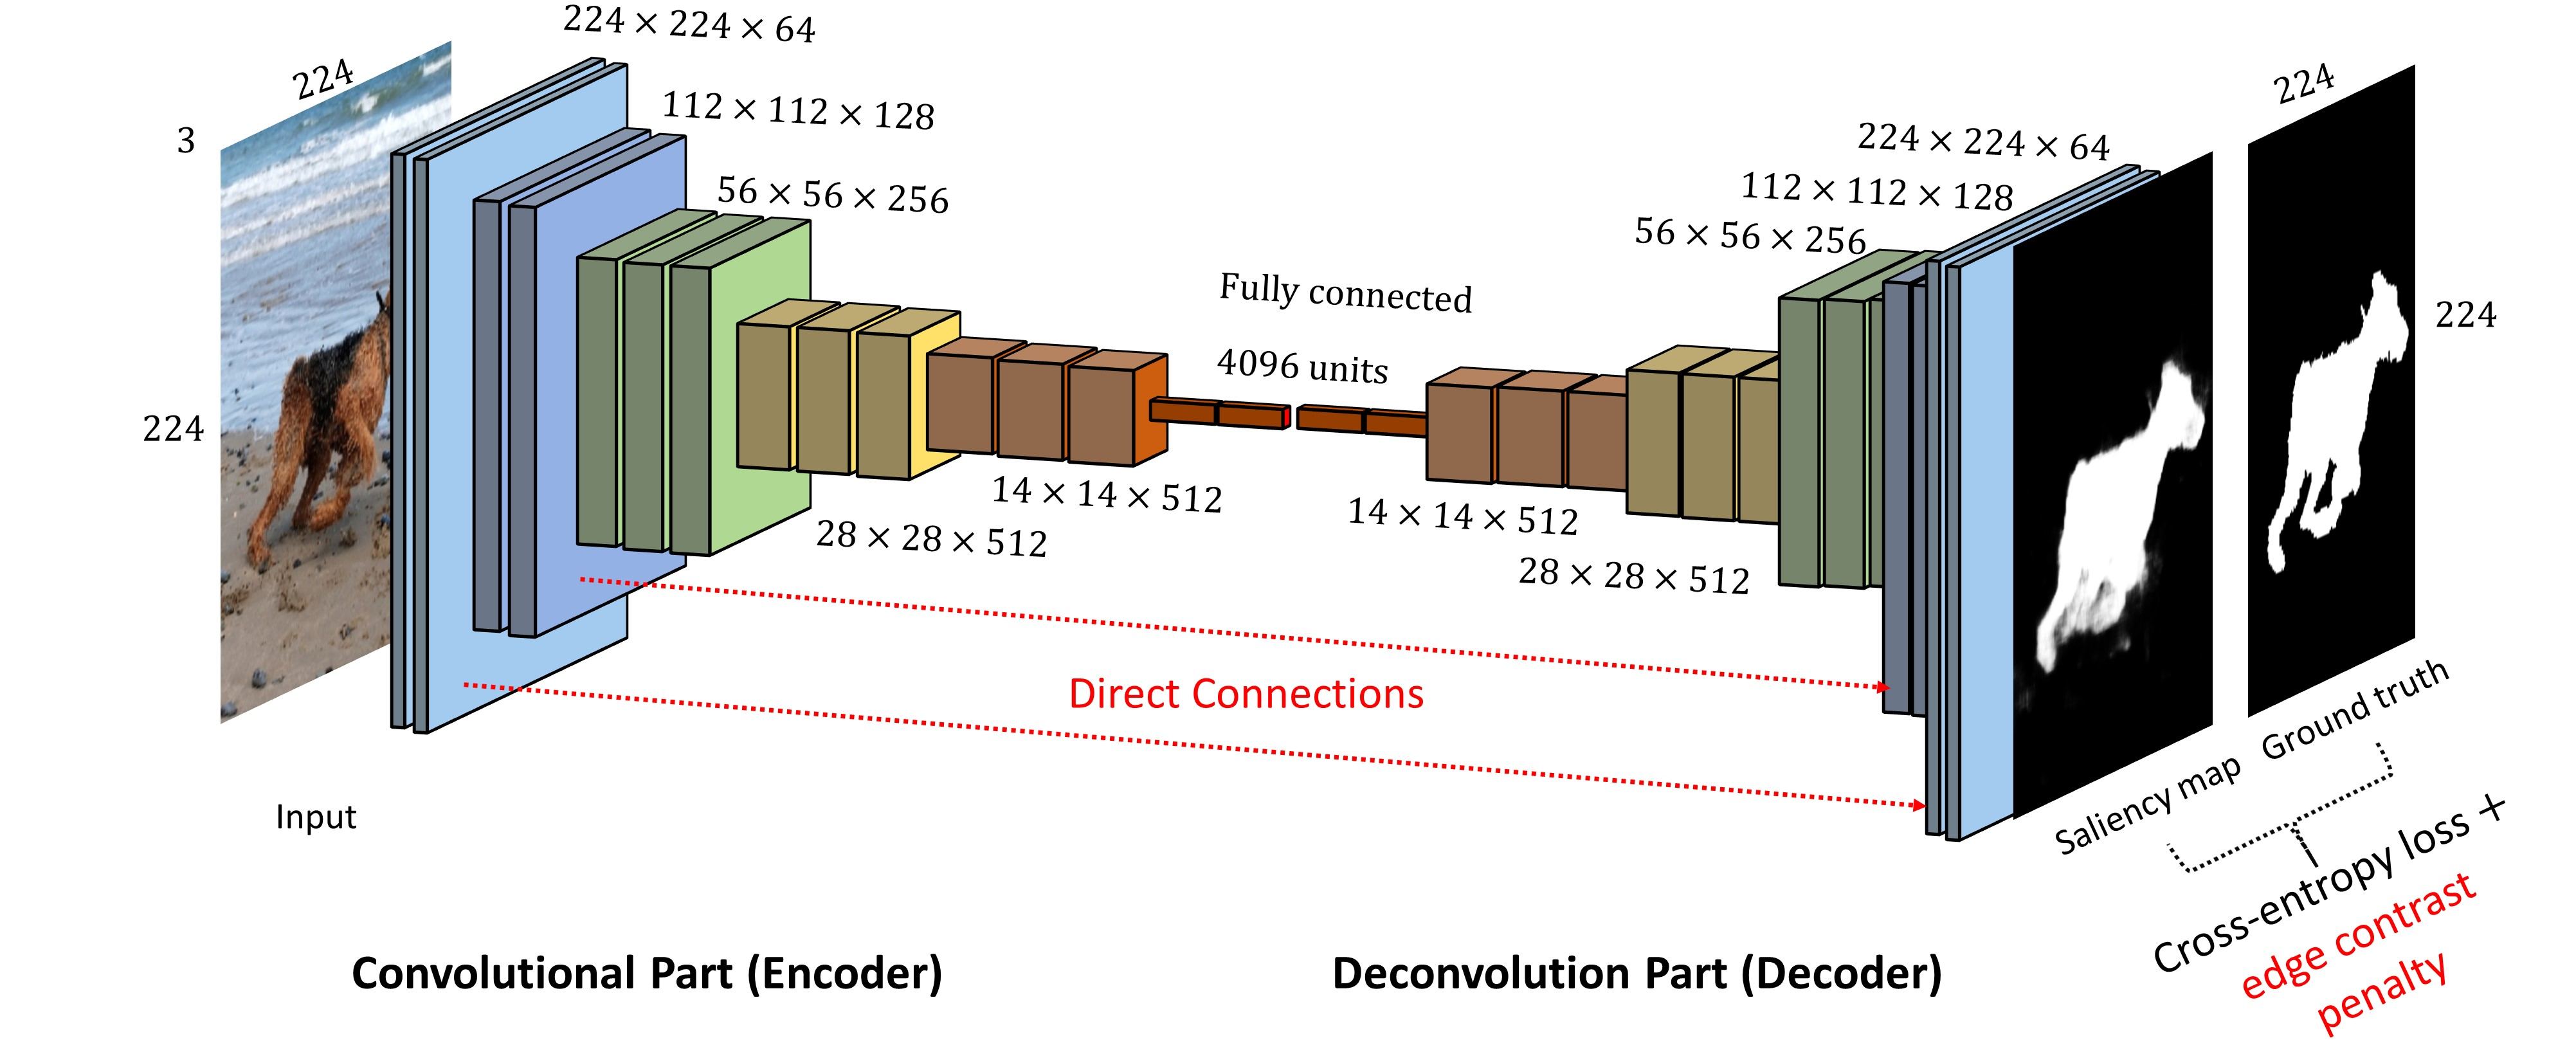

Introduction to Autoencoders? What are Autoencoders Applications and Types?
By Great Learning Team Updated on Mar 14, 2022 16797
What are autoencoders
Architecture of autoencoders
Types of autoencoders
Applications of autoencoders
Implementation
What are Autoencoders
Autoencoder is a type of neural network where the output layer has the same dimensionality as the input layer. In simpler words, the number of output units in the output layer is equal to the number of input units in the input layer. An autoencoder replicates the data from the input to the output in an unsupervised manner and is therefore sometimes referred to as a replicator neural network.

The autoencoders reconstruct each dimension of the input by passing it through the network. It may seem trivial to use a neural network for the purpose of replicating the input, but during the replication process, the size of the input is reduced into its smaller representation. The middle layers of the neural network have a fewer number of units as compared to that of input or output layers. Therefore, the middle layers hold the reduced representation of the input. The output is reconstructed from this reduced representation of the input.

Architecture of autoencoders
An autoencoder consists of three components:

Encoder: An encoder is a feedforward, fully connected neural network that compresses the input into a latent space representation and encodes the input image as a compressed representation in a reduced dimension. The compressed image is the distorted version of the original image.
Code: This part of the network contains the reduced representation of the input that is fed into the decoder.
Decoder: Decoder is also a feedforward network like the encoder and has a similar structure to the encoder. This network is responsible for reconstructing the input back to the original dimensions from the code.

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/50
235/235 [==============================] - 6s 20ms/step - loss: 0.2772 - val_loss: 0.1918
Epoch 2/50
235/235 [==============================] - 5s 22ms/step - loss: 0.1718 - val_loss: 0.1536
Epoch 3/50
235/235 [==============================] - 5s 20ms/step - loss: 0.1442 - val_loss: 0.1340
Epoch 4/50
235/235 [==============================] - 4s 19ms/step - loss: 0.1290 - val_loss: 0.1218
Epoch 5/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1187 - val_loss: 0.1131
Epoch 6/50
235/235 [==============================] - 2s 11ms/step - loss: 0.1111 - val_loss: 0.1068
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1058 - val_loss: 0.1025
Epoch 8/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1020 - val_loss: 0.0992
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0992 - val_loss: 0.0969
Epoch 10/50
235/235 [=====

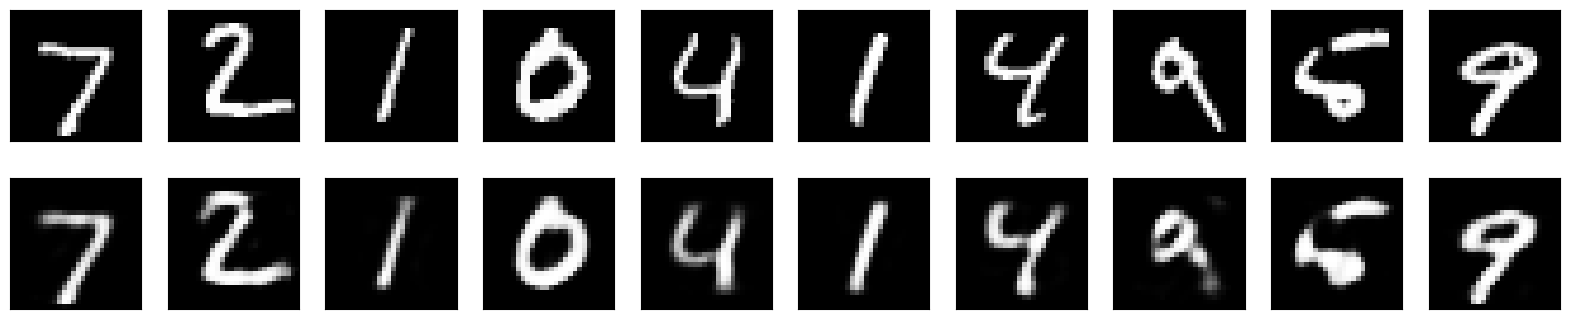

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Load and preprocess the data
(train_images, _), (test_images, _) = mnist.load_data()
train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.
train_images = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
test_images = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))

# Define the encoder and decoder layers
encoding_dim = 32  # Dimension of encoded representations

# Input placeholder
input_img = Input(shape=(784,))

# Encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# Full autoencoder model
autoencoder = Model(input_img, decoded)

# Separate encoder model
encoder = Model(input_img, encoded)

# Separate decoder model
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(train_images, train_images,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(test_images, test_images))

# Encode and decode some test images
encoded_imgs = encoder.predict(test_images)
decoded_imgs = decoder.predict(encoded_imgs)

# Visualize the results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


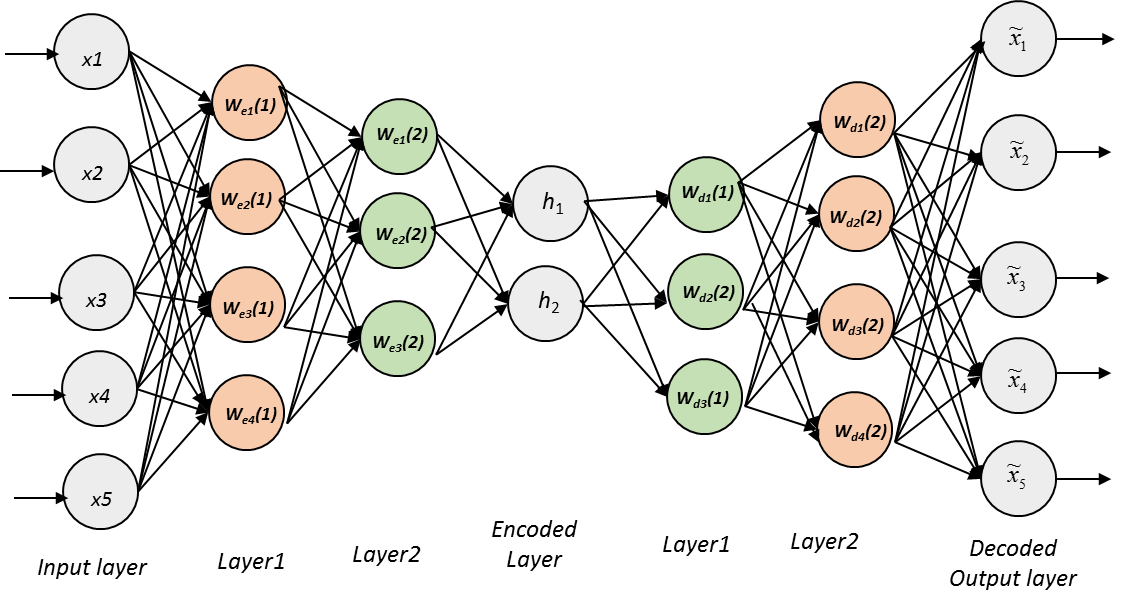